# 1. Load the "housing.csv" dataset and follow this link for the data description (features and target variable). Split the dataset in train and test set (use your choice of splitting). Train a linear regression model and report the performance (use your choice of at least 4 performance metric).

## Data Description

- **CRIM**: Per capita crime rate by town.
- **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft.
- **INDUS**: Proportion of non-retail business acres per town.
- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- **NOX**: Nitric oxide concentration (parts per 10 million).
- **RM**: Average number of rooms per dwelling.
- **AGE**: Proportion of owner-occupied units built prior to 1940.
- **DIS**: Weighted distances to five Boston employment centers.
- **RAD**: Index of accessibility to radial highways.
- **TAX**: Full-value property tax rate per \$10,000.
- **PTRATIO**: Pupil-teacher ratio by town.
- **B**: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town.
- **LSTAT**: Percentage of lower status of the population.
- **MEDV**: Median value of owner-occupied homes in $1000s.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline 
import seaborn as sns

In [2]:
house_df = pd.read_csv('housing.csv')
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
house_df.shape

(506, 14)

In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0    CRIM     506 non-null    float64
 1    ZN       506 non-null    float64
 2    INDUS    506 non-null    float64
 3    CHAS     506 non-null    int64  
 4    NOX      506 non-null    float64
 5    RM       506 non-null    float64
 6    AGE      506 non-null    float64
 7    DIS      506 non-null    float64
 8    RAD      506 non-null    int64  
 9    TAX      506 non-null    int64  
 10   PTRATIO  506 non-null    float64
 11   B        506 non-null    float64
 12   LSTAT    506 non-null    float64
 13   MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
house_df.isna().sum() 

 CRIM       0
 ZN         0
 INDUS      0
 CHAS       0
 NOX        0
 RM         0
 AGE        0
 DIS        0
 RAD        0
 TAX        0
 PTRATIO    0
 B          0
 LSTAT      0
 MEDV       0
dtype: int64

In [6]:
house_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


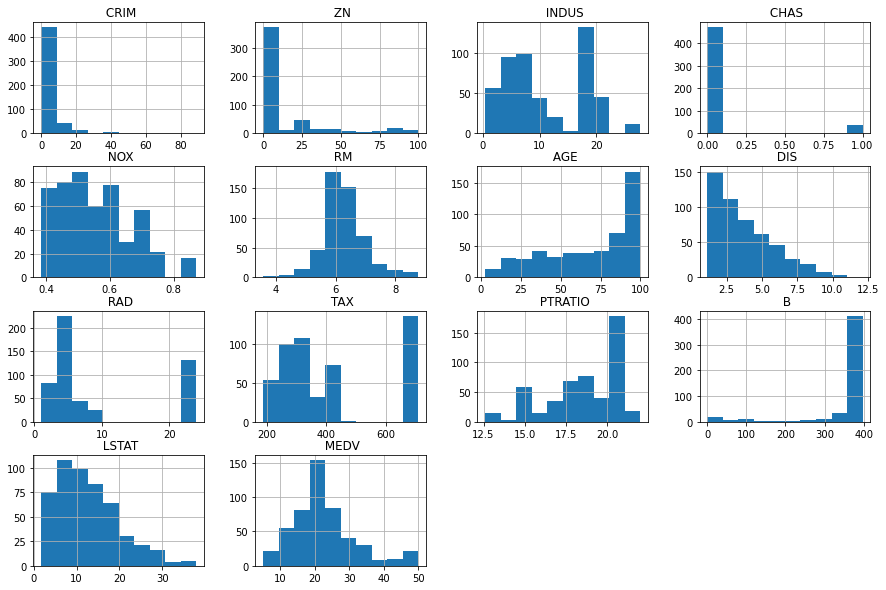

In [7]:
house_df.hist( figsize = [15,10]);

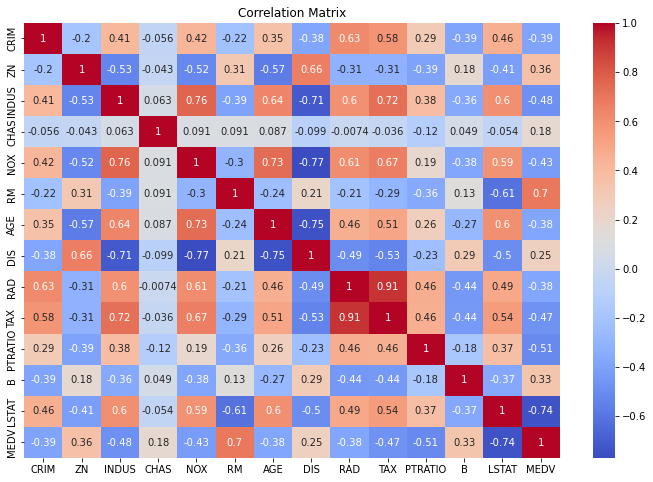

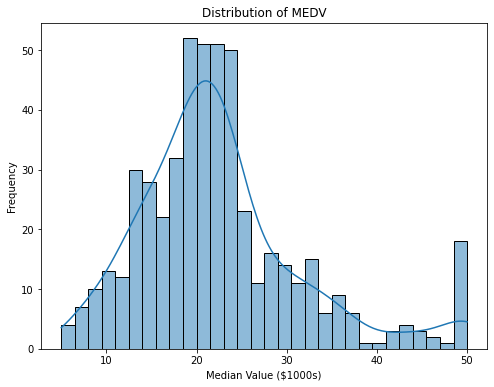

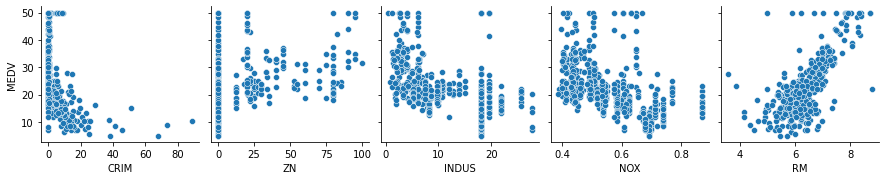

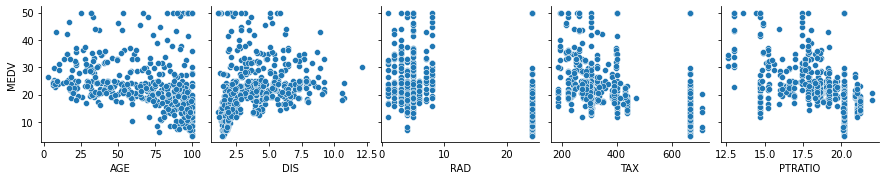

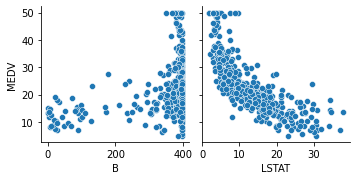

In [8]:
house_df.columns = house_df.columns.str.strip()

# Explore the correlation between features
correlation_matrix = house_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Explore the distribution of the target variable (MEDV)
plt.figure(figsize=(8, 6))
sns.histplot(house_df['MEDV'], kde=True, bins=30)
plt.title('Distribution of MEDV')
plt.xlabel('Median Value ($1000s)')
plt.ylabel('Frequency')
plt.show()

# Explore the relationships between features and the target variable
sns.pairplot(house_df, x_vars=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM'], y_vars='MEDV', kind='scatter')
plt.show()

sns.pairplot(house_df, x_vars=['AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO'], y_vars='MEDV', kind='scatter')
plt.show()

sns.pairplot(house_df, x_vars=['B', 'LSTAT'], y_vars='MEDV', kind='scatter')
plt.show()

C:\Users\Arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


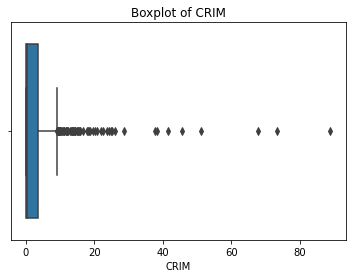

C:\Users\Arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


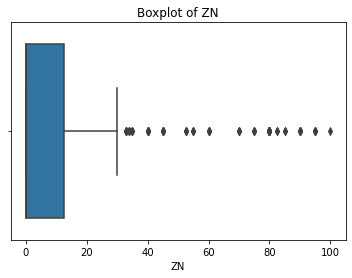

C:\Users\Arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


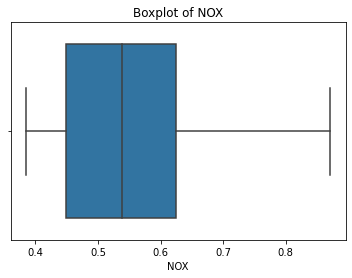

C:\Users\Arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


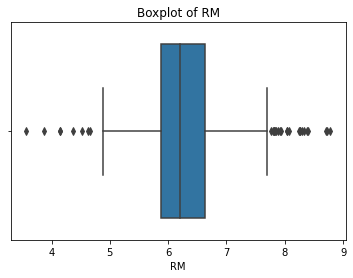

C:\Users\Arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


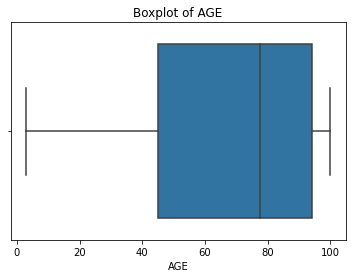

C:\Users\Arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


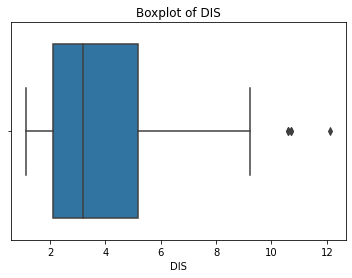

C:\Users\Arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


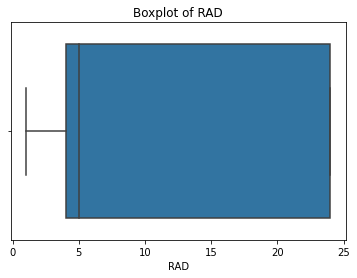

C:\Users\Arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


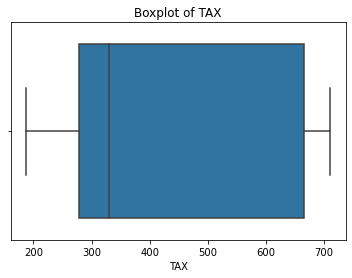

C:\Users\Arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


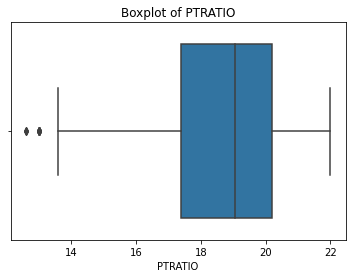

C:\Users\Arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


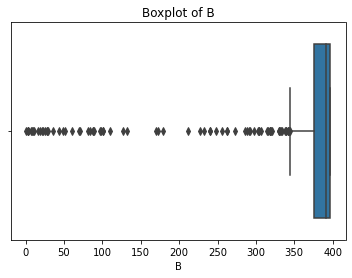

C:\Users\Arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


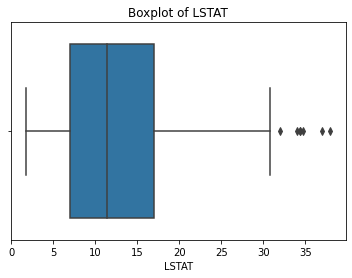

C:\Users\Arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


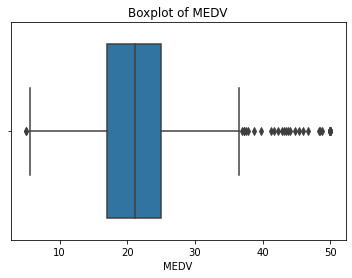

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Strip whitespaces from column names
house_df.columns = house_df.columns.str.strip()

for i in cols:
    sns.boxplot(house_df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()
    

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
# Split the dataset into features (X) and target variable (y)
X = house_df.drop(columns=['MEDV'])
y = house_df['MEDV']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 3.19
Mean Squared Error (MSE): 24.29
Root Mean Squared Error (RMSE): 4.93
R-squared (R2) Score: 0.67


# 2. Apply PCA on the dataset and select the first three principal components. Split the dataset into train and test using the same method used in Q1. Compare the performance of this model with the performance obtained in Q1. Explain the outcome

In [12]:
from sklearn.decomposition import PCA

In [13]:
# Apply PCA and select the first three principal components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Split the data into training (80%) and testing (20%) sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Make predictions on the testing set
y_pred_pca = model_pca.predict(X_test_pca)

# Evaluate the model's performance
mae_pca = mean_absolute_error(y_test, y_pred_pca)
mse_pca = mean_squared_error(y_test, y_pred_pca)
rmse_pca = mean_squared_error(y_test, y_pred_pca, squared=False)  # RMSE
r2_pca = r2_score(y_test, y_pred_pca)

# Print the performance metrics for the PCA model
print("Performance Metrics for PCA Model:")
print(f"Mean Absolute Error (MAE): {mae_pca:.2f}")
print(f"Mean Squared Error (MSE): {mse_pca:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_pca:.2f}")
print(f"R-squared (R2) Score: {r2_pca:.2f}")

Performance Metrics for PCA Model:
Mean Absolute Error (MAE): 4.99
Mean Squared Error (MSE): 47.20
Root Mean Squared Error (RMSE): 6.87
R-squared (R2) Score: 0.36


In [14]:
performance_df = pd.DataFrame({
    'Metric': ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R-squared (R2)'],
    'Original Model': [mae, mse, rmse, r2],
    'PCA Model': [mae_pca, mse_pca, rmse_pca, r2_pca]})
performance_df

,Metric,Original Model,PCA Model
0,Mean Absolute Error,3.189092,4.994052
1,Mean Squared Error,24.291119,47.202855
2,Root Mean Squared Error,4.928602,6.870433
3,R-squared (R2),0.668759,0.356329


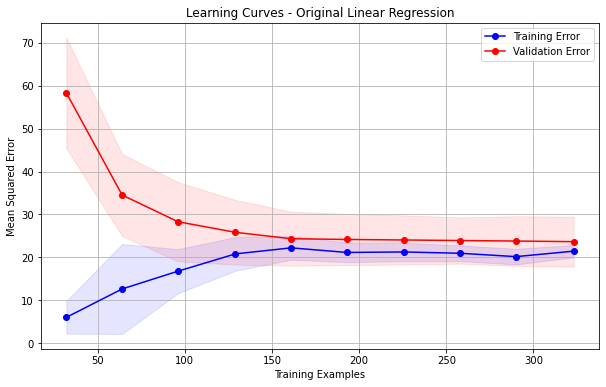

In [15]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curves for the original model
plt.figure(figsize=(10, 6))
plt.title('Learning Curves - Original Linear Regression')
plt.xlabel('Training Examples')
plt.ylabel('Mean Squared Error')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training Error')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r', label='Validation Error')
plt.legend(loc='best')
plt.show()

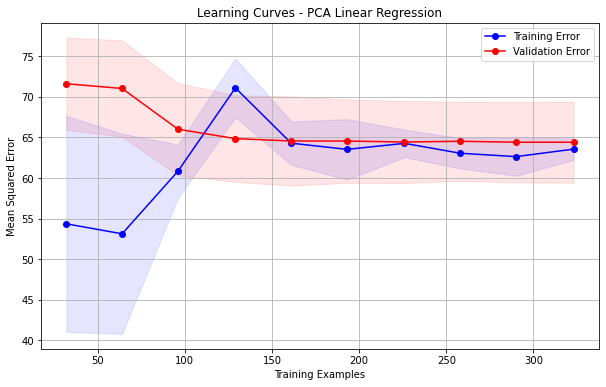

In [16]:
train_sizes, train_scores, test_scores = learning_curve(
    model_pca, X_train_pca, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curves for the PCA model
plt.figure(figsize=(10, 6))
plt.title('Learning Curves - PCA Linear Regression')
plt.xlabel('Training Examples')
plt.ylabel('Mean Squared Error')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training Error')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r', label='Validation Error')
plt.legend(loc='best')
plt.show()

We can say that according to the results obtained from original model and PCA moadel that original model performs much better than PCA model.  

| Metric                     | Original Model | PCA Model    |
|----------------------------|---------------:|-------------:|
| Mean Absolute Error        |       3.189092 |     4.994052 |
| Mean Squared Error         |      24.291119 |    47.202855 |
| Root Mean Squared Error    |       4.928602 |     6.870433 |
| R-squared (R2)             |       0.668759 |     0.356329 |   

We see that MAE, MSE, RMSE of original model is lower than PCA model. Thus, showing that original model is performing better. R squared is higher for original model, showing that there are much more accurate results are obtained with it.  
We can also see learning curve for original model is much stable than the PCA model.

**So original model works better.**

# 3. Load "IRIS " datasets from SKlearn and follow this link for the data description (features and target variable). Apply PCA on the dataset and select the first three principal components. Split the dataset in train and test set (use your choice of splitting). Train a logistic regression model and report the performance (use your choice of at least 4 performance metric).

In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the IRIS dataset
iris = load_iris()
X, y = iris.data, iris.target

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA and select the first three principal components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [18]:
# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [19]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(log_reg, X_pca, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.9        1.        ]
Mean CV accuracy: 0.9600000000000002


# 4. Apply L1 or L2 regulariser on the logistic regression model developed using the same train and test data used in Q3 and calculate performance of the new model. Compare performance of this model with the performance reported in Q3. Explain the outcome.

In [20]:
# Train the logistic regression model with L1 regularization
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear')
log_reg_l1.fit(X_train, y_train)

# Make predictions on the test set
y_pred_l1 = log_reg_l1.predict(X_test)

# Calculate performance metrics for L1 regularization
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
precision_l1 = precision_score(y_test, y_pred_l1, average='macro')
recall_l1 = recall_score(y_test, y_pred_l1, average='macro')
f1_l1 = f1_score(y_test, y_pred_l1, average='macro')

# Print the performance metrics for L1 regularization
print("L1 Regularization - Accuracy:", accuracy_l1)
print("L1 Regularization - Precision:", precision_l1)
print("L1 Regularization - Recall:", recall_l1)
print("L1 Regularization - F1-Score:", f1_l1)

# Train the logistic regression model with L2 regularization
log_reg_l2 = LogisticRegression(penalty='l2')
log_reg_l2.fit(X_train, y_train)

# Make predictions on the test set
y_pred_l2 = log_reg_l2.predict(X_test)

# Calculate performance metrics for L2 regularization
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
precision_l2 = precision_score(y_test, y_pred_l2, average='macro')
recall_l2 = recall_score(y_test, y_pred_l2, average='macro')
f1_l2 = f1_score(y_test, y_pred_l2, average='macro')

# Print the performance metrics for L2 regularization
print("L2 Regularization - Accuracy:", accuracy_l2)
print("L2 Regularization - Precision:", precision_l2)
print("L2 Regularization - Recall:", recall_l2)
print("L2 Regularization - F1-Score:", f1_l2)

L1 Regularization - Accuracy: 0.9666666666666667
L1 Regularization - Precision: 0.9722222222222222
L1 Regularization - Recall: 0.9629629629629629
L1 Regularization - F1-Score: 0.9658994032395567
L2 Regularization - Accuracy: 1.0
L2 Regularization - Precision: 1.0
L2 Regularization - Recall: 1.0
L2 Regularization - F1-Score: 1.0


In [21]:
# Print the performance metrics of the original model without regularization
print("Original Model (No Regularization) - Accuracy:", accuracy)
print("Original Model (No Regularization) - Precision:", precision)
print("Original Model (No Regularization) - Recall:", recall)
print("Original Model (No Regularization) - F1-Score:", f1)

Original Model (No Regularization) - Accuracy: 1.0
Original Model (No Regularization) - Precision: 1.0
Original Model (No Regularization) - Recall: 1.0
Original Model (No Regularization) - F1-Score: 1.0


We can say that all the models are performing well on this data as all are giving us good results. L2 and original model perform best.  
L1 and L2 may be much more useful in bigger datasets.  
Also we must understand that L1 model is easier to interpret as L1 regularization adds a penalty term to the loss function that is proportional to the absolute value of the model's coefficients. Whereas L2 regularization adds a penalty term to the loss function that is proportional to the squared magnitude of the model's coefficients

# 5. Load "digits" datasets from SKlearn and print the dimension of the dataset. Apply PCA on the dataset and select first three components. Print the dimension of modified dataset and visualise the data using appropriate plotting tool/s.

Dimension of the original dataset: (1797, 64)
Dimension of the modified dataset after PCA: (1797, 3)


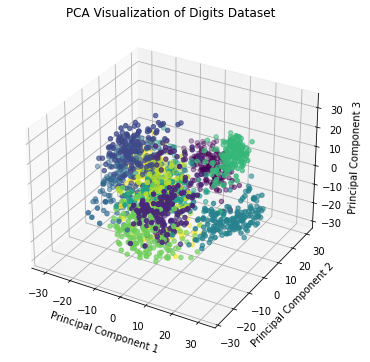

In [22]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# Load the "digits" dataset
digits = load_digits()
data = digits.data
target = digits.target

# Print the dimension of the original dataset
print("Dimension of the original dataset:", data.shape)

# Apply PCA and select the first three components
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data)

# Print the dimension of the modified dataset
print("Dimension of the modified dataset after PCA:", data_pca.shape)

# Visualize the data in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=target, cmap='viridis')
ax.set_title('PCA Visualization of Digits Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()

# 6. Classify the digit classes available in the dataset (use the modified dataset) using SVM with RBF kernel. Select appropriate data splitting approach and performance metrics. Report the performances and the used model hyper-parameters. 

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(data_pca, target, test_size=0.3, random_state=42)

# Create an SVM classifier with RBF kernel
svm_classifier = SVC(kernel='rbf')

# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': [0.01, 0.1, 1]  # Kernel coefficient for 'rbf'
}

# Perform grid search using cross-validation to find the best hyperparameters
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_svm_model.predict(X_test)

# Print the best hyperparameters and performance metrics
print("Best Hyperparameters:", best_params)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'C': 1, 'gamma': 0.01}

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        53
           1       0.88      0.74      0.80        50
           2       0.78      0.85      0.82        47
           3       0.90      0.80      0.84        54
           4       0.94      0.97      0.95        60
           5       0.55      0.26      0.35        66
           6       1.00      0.94      0.97        53
           7       0.73      0.85      0.79        55
           8       0.41      0.74      0.53        43
           9       0.73      0.78      0.75        59

    accuracy                           0.77       540
   macro avg       0.79      0.78      0.77       540
weighted avg       0.79      0.77      0.77       540



# 7. Load "diabetes" datasets from SKlearn and print the dimension of the dataset. Apply tSNE method to reduce dimension and select first three components. Plot the selected components using appropriate visualisation technique.

Original dataset dimensions:  (442, 10)


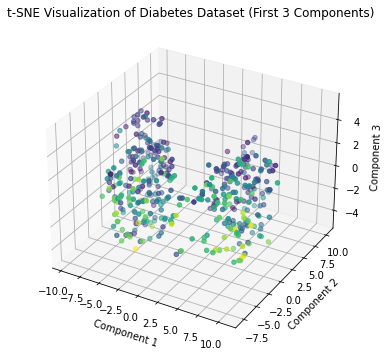

In [24]:
from sklearn.datasets import load_diabetes
from sklearn.manifold import TSNE
# Load the diabetes dataset
data = load_diabetes()
X, y = data.data, data.target

# Print the dimension of the dataset
print("Original dataset dimensions: ", X.shape)

# Apply t-SNE to reduce dimensionality to 3 components
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the selected components
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with the first three components
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y, cmap='viridis')
ax.set_title('t-SNE Visualization of Diabetes Dataset (First 3 Components)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()

# 8. Create a model for detecting diabetes using SVM with a poly kernel. Select appropriate data splitting approach and performance metrics. Report the performances and the used model hyper-parameters.


In [25]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the diabetes dataset
data = load_diabetes()
X, y = data.data, data.target

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVR model with a polynomial kernel (adjust C and degree hyperparameters as needed)
C = 1.0  # Regularization parameter
degree = 3  # Degree of the polynomial kernel
svr_model = SVR(kernel='poly', C=C, degree=degree)

# Train the SVR model on the training data
svr_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = svr_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Report the performances and used model hyperparameters
print("SVR model with a polynomial kernel (degree={} and C={})".format(degree, C))
print("-------------------------------------------------------")
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("R-squared (R2) Score: {:.2f}".format(r2))

SVR model with a polynomial kernel (degree=3 and C=1.0)
-------------------------------------------------------
Mean Squared Error (MSE): 3803.04
Mean Absolute Error (MAE): 51.66
R-squared (R2) Score: 0.28


# 9. Based on the model hyper-parameters used in Q6 and Q8, share your understanding of hyper-parameters tuning in ML model development.

<span style="font-size:large;">Hyperparameters are predefined parameters used before machine learning process begins and thus train data learns under these parameters. Thus these are defined by the programer. These are then hypertuned with automated hyperparameter optimization library like GridSearchCV or RandomizedSearchCV. So that the model is not overfit or underfit. After this the model is evaluated on test set.</span>


# Bibliography  

Javatpoint. Machine Learning - Support Vector Machine Algorithm. javatpoint. https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm

Brownlee, J. (2023, June 15). Learning Curves for Diagnosing Machine Learning Model Performance. Machine Learning Mastery. https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

codebasics. (2019). Machine Learning Tutorial Python - 10 Support Vector Machine (SVM). [YouTube video]. YouTube. URL: https://www.youtube.com/watch?v=FB5EdxAGxQg